<a href="https://colab.research.google.com/github/mjvakili/MLcourse/blob/master/day1/QSO_photoz_estimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SDSS Quasar photometric redshift estimation

Let us start by downloading the dataset. This data has been downloaded via an SQL quarey that you can view on the github repository. 

The following script downloads the dataset from the website and places it in a temporary path: 

In [1]:
!wget --no-check-certificate \
    https://home.strw.leidenuniv.nl/~vakili/MLcourse/sdss_qso.csv \
    -O /tmp/sdss_qso.csv

--2019-11-19 10:05:36--  https://home.strw.leidenuniv.nl/~vakili/MLcourse/sdss_qso.csv
Resolving home.strw.leidenuniv.nl (home.strw.leidenuniv.nl)... 132.229.214.164
Connecting to home.strw.leidenuniv.nl (home.strw.leidenuniv.nl)|132.229.214.164|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20132912 (19M) [text/csv]
Saving to: ‘/tmp/sdss_qso.csv’

/tmp/sdss_qso.csv   100%[===================>]  19.20M  14.9MB/s    in 1.3s    

2019-11-19 10:05:38 (14.9 MB/s) - ‘/tmp/sdss_qso.csv’ saved [20132912/20132912]



In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Let's start exploring the dataset:

In [0]:
df = pd.read_csv("/tmp/sdss_qso.csv")

In [4]:
df[:1000]

,dered_u,dered_g,dered_r,dered_i,dered_z,fiberMag_u,fiberMag_g,fiberMag_r,fiberMag_i,fiberMag_z,diff_u,diff_g,diff_r,diff_i,diff_z,petroRad_u,petroRad_g,petroRad_r,petroRad_i,petroRad_z,redshift
0,22.25652,21.55965,21.42463,21.58704,20.73633,22.75817,22.12018,21.84616,22.07720,20.78783,-0.015032,0.004080,-0.030247,-0.021656,-0.099403,1.700092,3.358297,1.745435,2.969959,1.648311,1.534371
1,25.61362,21.37317,19.82928,19.06060,18.56448,23.70961,22.79477,21.21302,20.34772,19.83361,0.318380,-1.331427,-1.457150,-1.339752,-1.208082,2.970037,2.969942,4.910667,3.571051,1.774521,0.487301
2,22.38822,21.53196,21.52578,21.56912,20.92359,22.73977,21.94479,22.12121,22.23254,21.40081,0.040892,-0.005512,0.009399,0.017574,0.000021,2.355313,1.415239,0.932999,1.060373,1.295663,2.595718
3,19.51385,18.95083,19.05317,19.02340,18.79524,20.03950,19.42415,19.49550,19.43947,19.22676,0.012049,-0.013666,-0.007858,-0.010206,0.001295,1.396549,1.420520,1.169256,1.200228,1.114397,2.360778
4,21.46911,20.91984,21.09158,20.90268,20.55534,21.99944,21.43637,21.65856,21.27289,20.85031,0.044270,0.006880,0.007637,0.007030,0.000391,1.185477,1.368817,0.969652,0.923091,0.945056,2.140643
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,20.72985,18.44296,17.39688,16.89732,16.56726,24.39383,21.82757,19.95135,18.91295,18.12723,0.124922,0.008959,-0.002213,0.030592,-0.010651,2.969265,1.235052,0.996243,0.874454,4.977783,1.398531
996,19.81444,18.88401,18.53329,18.34061,18.22706,23.80083,21.96398,20.89540,20.25877,19.65088,0.137714,-0.012794,-0.028240,-0.000229,-0.028791,2.969265,1.282510,1.048824,0.797315,0.924590,1.170415
997,19.83793,18.68726,18.41693,18.28644,18.27711,24.00421,21.78446,20.84345,20.19491,19.66369,-0.018000,0.003969,0.010445,0.011854,-0.003019,7.359129,1.247473,0.873047,0.886319,0.990157,1.169615
998,18.84818,18.43690,18.01802,18.03142,18.04972,22.78457,21.48398,20.31403,19.92673,19.41883,-0.001116,-0.048527,-0.082600,-0.016754,-0.089796,2.016205,1.150969,1.080054,0.880667,4.005743,1.277432


In [0]:
X_columns = ['dered_u', 'dered_g', 'dered_r', 'dered_i', 'dered_z']
Y_column = ['redshift']
dfX = df[X_columns]
dfY = df[Y_column]

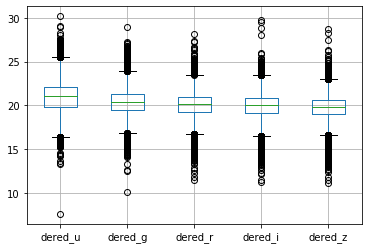

In [18]:
boxplot = dfX.boxplot()

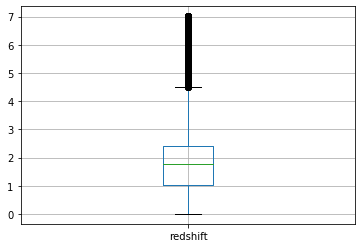

In [19]:
boxplot = dfY.boxplot()

Text(0, 0.5, 'variables')

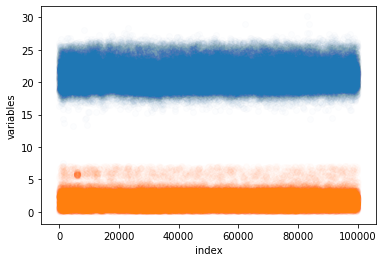

In [28]:
plt.scatter(dfX.index, dfX.dered_u, alpha = .01)
plt.scatter(dfX.index, dfY.redshift, alpha = .01)
plt.xlabel('index')
plt.ylabel('variables')

Text(0.5, 0.98, 'distribution of the input variables color-coded with redshift')

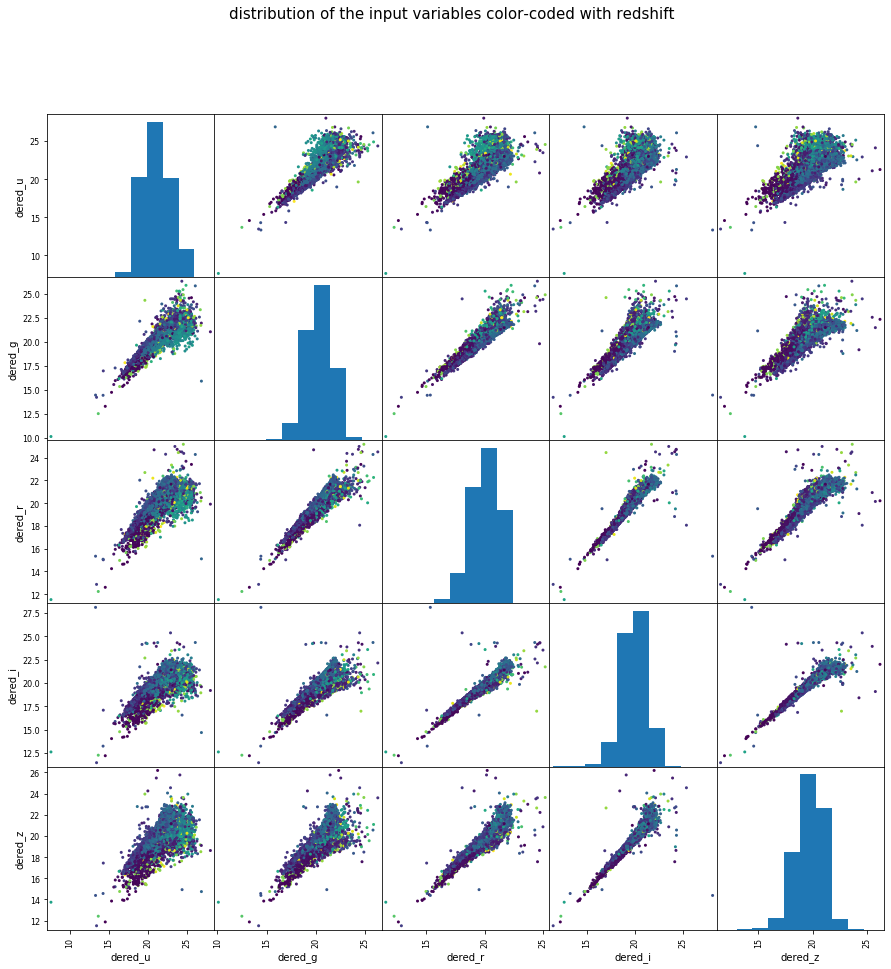

In [66]:
import matplotlib as mpl
import matplotlib.cm as cm

dfX_sub, dfY_sub = dfX[:10000], dfY[:10000]

norm = mpl.colors.Normalize(vmin=min(dfY_sub.redshift), vmax=max(dfY_sub.redshift))

m = cm.ScalarMappable(norm=norm)
pd.plotting.scatter_matrix(dfX_sub, alpha=1 ,figsize=[15,15],color=m.to_rgba(dfY_sub.redshift))
plt.suptitle('distribution of the input variables color-coded with redshift', fontsize = 15)

In [0]:
new_keys = ['u-g', 'g-r', 'r-i', 'i-z', 'r']
new_cols = np.vstack([dfX.dered_u - dfX.dered_g, dfX.dered_g - dfX.dered_r, dfX.dered_r - dfX.dered_i, dfX.dered_i - dfX.dered_z, dfX.dered_r]).T

In [0]:
dfX_new = pd.DataFrame(data = new_cols, columns = new_keys)

In [63]:
dfX_new

,u-g,g-r,r-i,i-z,r
0,0.69687,0.13502,-0.16241,0.85071,21.42463
1,4.24045,1.54389,0.76868,0.49612,19.82928
2,0.85626,0.00618,-0.04334,0.64553,21.52578
3,0.56302,-0.10234,0.02977,0.22816,19.05317
4,0.54927,-0.17174,0.18890,0.34734,21.09158
...,...,...,...,...,...
99995,-0.06212,-0.07101,0.24099,0.11984,21.55914
99996,1.44984,0.71386,0.32350,0.40864,20.56219
99997,0.91735,0.24268,1.13485,3.90628,24.44385
99998,0.03347,0.17763,0.03432,-0.07504,19.85286


Text(0.5, 0.98, 'distribution of the input variables color-coded with redshift')

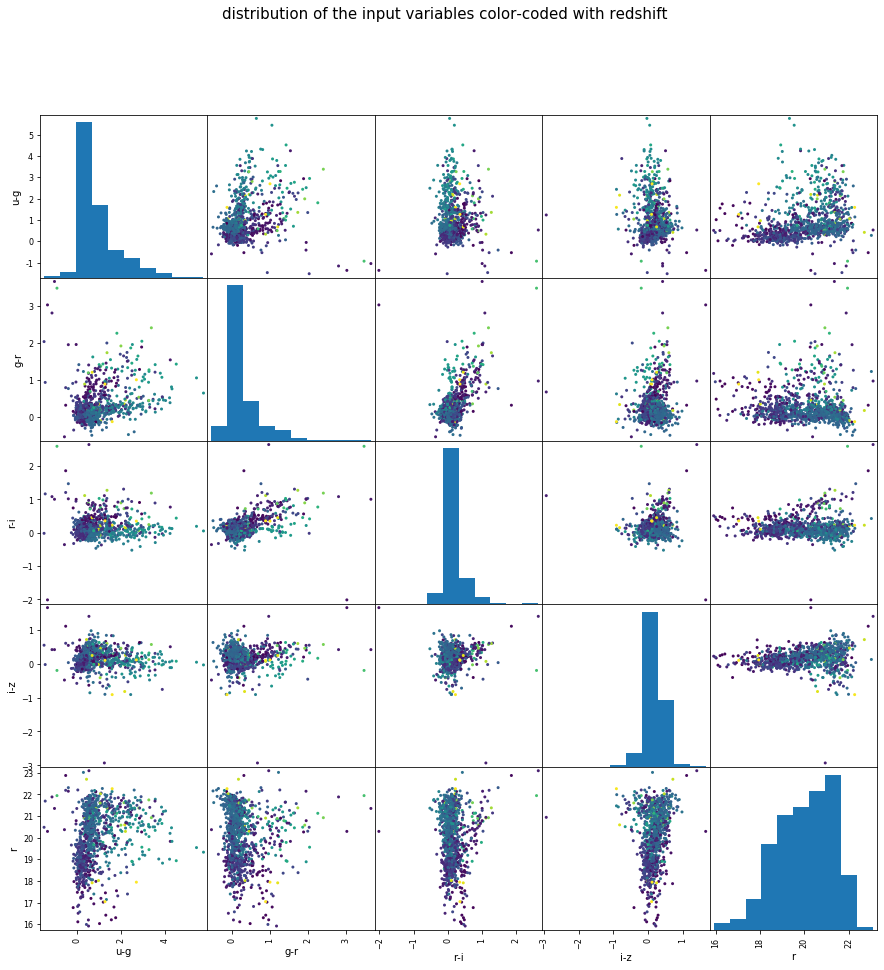

In [67]:
dfX_sub, dfY_sub = dfX_new[:1000], dfY[:1000]

norm = mpl.colors.Normalize(vmin=min(dfY_sub.redshift), vmax=max(dfY_sub.redshift))

m = cm.ScalarMappable(norm=norm)
pd.plotting.scatter_matrix(dfX_sub, alpha=1,figsize=[15,15],color=m.to_rgba(dfY_sub.redshift))
plt.suptitle('distribution of the input variables color-coded with redshift', fontsize = 15)

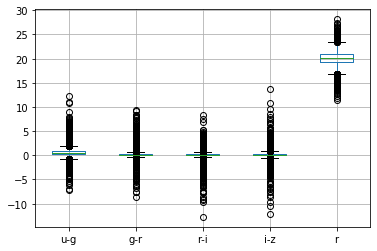

In [69]:
dfX_new.boxplot()